In [1]:
import pandas as pd
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import joblib  # For saving the model
import matplotlib.pyplot as plt

In [2]:
database = pd.read_csv("/content/drive/MyDrive/Competicoes/Google/LCD_sample_csv.csv")

In [3]:
database.describe()

,ELEVATION,LATITUDE,LONGITUDE,HourlyVisibility,HourlyDryBulbTemperatureF,HourlyDryBulbTemperatureC,HourlyWetBulbTemperatureF,HourlyWetBulbTemperatureC,HourlyDewPointTemperatureF,HourlyDewPointTemperatureC,...,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureValueDate,MonthlyMaxSeaLevelPressureValueTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDepartureFromNormalHeatingDD,MonthlyDepartureFromNormalCoolingDD
count,7.720000e+02,7.720000e+02,7.720000e+02,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.018000e+02,4.199500e+01,-8.793360e+01,9.230121,31.628032,-0.208356,27.723720,-2.368868,18.384097,-7.564825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.137605e-13,3.270616e-13,1.365126e-12,2.032510,12.196620,6.778430,11.076008,6.151487,11.859361,6.587330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.018000e+02,4.199500e+01,-8.793360e+01,0.500000,-1.000000,-18.300000,-2.000000,-19.200000,-17.000000,-27.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,22.000000,-5.600000,19.000000,-7.200000,9.000000,-12.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,32.000000,0.000000,28.500000,-1.950000,20.000000,-6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,40.000000,4.400000,36.000000,2.000000,28.000000,-2.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.018000e+02,4.199500e+01,-8.793360e+01,10.000000,67.000000,19.400000,59.000000,15.200000,47.000000,8.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
database['reportType'].unique()

array(['FM-15', 'SOD'], dtype=object)

In [5]:

# Supondo que 'df' é o DataFrame pandas
database.fillna(0, inplace=True)  # Preenche inicialmente todos os NaNs com 0

for column in database.columns:
    if database[column].dtype in ['int64', 'float64']:  # Verifica se a coluna é numérica
        median_value = database[column].median()
        database[column].replace(0, median_value, inplace=True)  # Substitui 0 pela mediana
    else:  # Supõe que colunas não numéricas são categóricas
        mode_value = database[column][database[column] != 0].mode()  # Calcula a moda excluindo 0
        if not mode_value.empty:
            mode_value = mode_value[0]
            database[column].replace(0, mode_value, inplace=True)  # Substitui 0 pela moda

# O DataFrame 'df' agora tem os valores ajustados conforme a lógica descrita


# The DataFrame 'df' now has NaN values replaced with median/mode as specified

#database_cleaned = database.dropna(axis=1)

print("Before:")
print(database)
#print("\nAfter:")
#print(database_cleaned)
database.head(5)

<ipython-input-5-615650c4e1e9>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  database[column].replace(0, mode_value, inplace=True)  # Substitui 0 pela moda
<ipython-input-5-615650c4e1e9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

Before:
        STATION                               STATION_NAME  ELEVATION  \
0    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
1    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
2    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
3    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
4    WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
..          ...                                        ...        ...   
767  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
768  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
769  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
770  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   
771  WBAN:94846  CHICAGO OHARE INTERNATIONAL AIRPORT IL US      201.8   

     LATITUDE  LONGITUDE              DATE reportType  \
0      41.995   -87.9336  2014-03-01 00:51      FM-15   
1

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,reportType,HourlySkyConditions,HourlyVisibility,HourlyPresentWeatherType,...,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureValueDate,MonthlyMaxSeaLevelPressureValueTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDepartureFromNormalHeatingDD,MonthlyDepartureFromNormalCoolingDD
0,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,201.8,41.995,-87.9336,2014-03-01 00:51,FM-15,SCT:04 70 OVC:08 90,10.00,-SN:03 |SN:71 |,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,201.8,41.995,-87.9336,2014-03-01 01:51,FM-15,OVC:08 50,10.00,-SN:03 |SN:71 |,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,201.8,41.995,-87.9336,2014-03-01 02:51,FM-15,OVC:08 29,6.00,-SN:03 |SN:71 |,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,201.8,41.995,-87.9336,2014-03-01 03:51,FM-15,VV:09 9,0.75,-SN:03 |SN:71 |,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WBAN:94846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,201.8,41.995,-87.9336,2014-03-01 04:51,FM-15,OVC:08 8,10.00,-SN:03 |SN:71 |,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:

# Dicionário para armazenar os mapeamentos de categorias para números
category_mappings = {}

# Substituir valores categóricos por numéricos discretos
for column in database.columns:
    if database[column].dtype == 'object':  # Verifica se a coluna é categórica
        # Cria um mapeamento de categoria para número
        unique_values = database[column].unique()
        mapping = {category: idx for idx, category in enumerate(unique_values)}
        category_mappings[column] = mapping  # Salva o mapeamento para a legenda
        # Substitui os valores categóricos por números
        database[column] = database[column].map(mapping)
'''
# Loop para criar gráficos
for column in database.columns:
    plt.figure(figsize=(8, 5))  # Define o tamanho da figura

    if database[column].dtype in ['int64', 'float64']:  # Variável numérica
        plt.hist(database[column], bins=20, color='blue', alpha=0.7)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Adiciona a legenda, se for categórico convertido
        if column in category_mappings:
            legend_text = '\n'.join([f'{key}: {value}' for value, key in category_mappings[column].items()])
            plt.figtext(0.99, 0.5, f'Legend:\n{legend_text}', horizontalalignment='left', fontsize=9, wrap=True)
    else:  # Caso improvável, mas adicionado como fallback
        database[column].value_counts().plot(kind='bar', color='green', alpha=0.7)
        plt.title(f'Count of categories in {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
    print(column)
    plt.tight_layout()  # Ajusta o layout
    plt.show()  # Mostra o gráfico
'''

"\n# Loop para criar gráficos\nfor column in database.columns:\n    plt.figure(figsize=(8, 5))  # Define o tamanho da figura\n\n    if database[column].dtype in ['int64', 'float64']:  # Variável numérica\n        plt.hist(database[column], bins=20, color='blue', alpha=0.7)\n        plt.title(f'Distribution of {column}')\n        plt.xlabel(column)\n        plt.ylabel('Frequency')\n\n        # Adiciona a legenda, se for categórico convertido\n        if column in category_mappings:\n            legend_text = '\n'.join([f'{key}: {value}' for value, key in category_mappings[column].items()])\n            plt.figtext(0.99, 0.5, f'Legend:\n{legend_text}', horizontalalignment='left', fontsize=9, wrap=True)\n    else:  # Caso improvável, mas adicionado como fallback\n        database[column].value_counts().plot(kind='bar', color='green', alpha=0.7)\n        plt.title(f'Count of categories in {column}')\n        plt.xlabel(column)\n        plt.ylabel('Count')\n    print(column)\n    plt.tight_

In [7]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [17]:
# Ensure that you are working with a copy to avoid the Warning
database_cleaned = database.copy()

# Data processing
# Converting 'DATE' to datetime, forcing the data type with errors='coerce'
# and filling invalid values with NaT (Not a Time)
# Checking the format of the 'DATE' column before conversion

database_cleaned.loc[:, 'DATE'] = pd.to_datetime(database_cleaned['DATE'], errors='coerce')

# Filtering rows with invalid values in 'DATE'
database_cleaned = database_cleaned.dropna(subset=['DATE'])


# Dropping irrelevant or redundant columns
database_cleaned = database_cleaned.drop(columns=['STATION', 'STATION_NAME', 'DATE', 'reportType'])

# Defining a target column for the example (predicting 'DailySunset')
target_column = 'DailyHeatingDegreeDays'
X = database_cleaned.drop(columns=[target_column])
y = database_cleaned[target_column]

print(X,y)
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
joblib.dump(model, "/content/drive/MyDrive/Competicoes/working_model.pkl")  # Change the filename as needed
print(f"Mean Squared Error (MSE): {mse}")


<ipython-input-17-149c61352127>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
[          '1970-01-01 00:00:00', '1970-01-01 00:00:00.000000001',
 '1970-01-01 00:00:00.000000002', '1970-01-01 00:00:00.000000003',
 '1970-01-01 00:00:00.000000004', '1970-01-01 00:00:00.000000005',
 '1970-01-01 00:00:00.000000006', '1970-01-01 00:00:00.000000007',
 '1970-01-01 00:00:00.000000008', '1970-01-01 00:00:00.000000009',
 ...
 '1970-01-01 00:00:00.000000762', '1970-01-01 00:00:00.000000763',
 '1970-01-01 00:00:00.000000764', '1970-01-01 00:00:00.000000765',
 '1970-01-01 00:00:00.000000766', '1970-01-01 00:00:00.000000767',
 '1970-01-01 00:00:00.000000768', '1970-01-01 00:00:00.000000769',
 '1970-01-01 00:00:00.000000770', '1970-01-01 00:00:00.000000771']
Length: 772, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  database_cleaned.loc[:, 'DATE']

     ELEVATION  LATITUDE  LONGITUDE  HourlySkyConditions  HourlyVisibility  \
0        201.8    41.995   -87.9336                    0             10.00   
1        201.8    41.995   -87.9336                    1             10.00   
2        201.8    41.995   -87.9336                    2              6.00   
3        201.8    41.995   -87.9336                    3              0.75   
4        201.8    41.995   -87.9336                    4             10.00   
..         ...       ...        ...                  ...               ...   
767      201.8    41.995   -87.9336                  390             10.00   
768      201.8    41.995   -87.9336                  391             10.00   
769      201.8    41.995   -87.9336                  392             10.00   
770      201.8    41.995   -87.9336                  291             10.00   
771      201.8    41.995   -87.9336                  393             10.00   

     HourlyPresentWeatherType  HourlyDryBulbTemperatureF  \
0  

In [18]:
# Get all columns from X_train
all_columns = X_train.columns
numerical_columns = X_train.select_dtypes(include=['number']).columns
# Create a dictionary with all columns and initialize with 0
new_data_dict = {col: [1, 2, 3] for col in all_columns}

# Update the dictionary with your specific values for some columns
new_data_dict = {
    col: [
        X_train[col].mean(),                        # Original mean
        X_train[col].mean() * 1.25,
        X_train[col].mean() * 1.50,
        X_train[col].mean() * 1.75,
        X_train[col].mean() * 2,
        X_train[col].mean() * 2.25,
        X_train[col].mean() * 2.50,
        X_train[col].mean() * 2.75,
        X_train[col].mean() * 3,
    ]
    for col in numerical_columns
}

# Create the DataFrame
new_data = pd.DataFrame(new_data_dict)
print(new_data)
predictions = model.predict(new_data)

print(predictions)

   ELEVATION   LATITUDE  LONGITUDE  HourlySkyConditions  HourlyVisibility  \
0     201.80   41.99500   -87.9336           147.388979          9.192058   
1     252.25   52.49375  -109.9170           184.236224         11.490073   
2     302.70   62.99250  -131.9004           221.083468         13.788088   
3     353.15   73.49125  -153.8838           257.930713         16.086102   
4     403.60   83.99000  -175.8672           294.777958         18.384117   
5     454.05   94.48875  -197.8506           331.625203         20.682131   
6     504.50  104.98750  -219.8340           368.472447         22.980146   
7     554.95  115.48625  -241.8174           405.319692         25.278160   
8     605.40  125.98500  -263.8008           442.166937         27.576175   

   HourlyPresentWeatherType  HourlyDryBulbTemperatureF  \
0                  0.351702                  31.614263   
1                  0.439627                  39.517828   
2                  0.527553                  47.421394 

In [19]:
pip install lime shap


In [20]:
new_data

,ELEVATION,LATITUDE,LONGITUDE,HourlySkyConditions,HourlyVisibility,HourlyPresentWeatherType,HourlyDryBulbTemperatureF,HourlyDryBulbTemperatureC,HourlyWetBulbTemperatureF,HourlyWetBulbTemperatureC,...,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureValueDate,MonthlyMaxSeaLevelPressureValueTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDepartureFromNormalHeatingDD,MonthlyDepartureFromNormalCoolingDD
0,201.80,41.99500,-87.9336,147.388979,9.192058,0.351702,31.614263,-0.251053,27.760130,-2.372123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,252.25,52.49375,-109.9170,184.236224,11.490073,0.439627,39.517828,-0.313817,34.700162,-2.965154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,302.70,62.99250,-131.9004,221.083468,13.788088,0.527553,47.421394,-0.376580,41.640194,-3.558185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,353.15,73.49125,-153.8838,257.930713,16.086102,0.615478,55.324959,-0.439344,48.580227,-4.151216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,403.60,83.99000,-175.8672,294.777958,18.384117,0.703404,63.228525,-0.502107,55.520259,-4.744246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,454.05,94.48875,-197.8506,331.625203,20.682131,0.791329,71.132091,-0.564870,62.460292,-5.337277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,504.50,104.98750,-219.8340,368.472447,22.980146,0.879254,79.035656,-0.627634,69.400324,-5.930308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,554.95,115.48625,-241.8174,405.319692,25.278160,0.967180,86.939222,-0.690397,76.340357,-6.523339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,605.40,125.98500,-263.8008,442.166937,27.576175,1.055105,94.842788,-0.753160,83.280389,-7.116370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
import lime
import lime.lime_tabular
import numpy as np

# Assuming the model has already been trained
# Use the training data's feature names and the model for LIME explanation

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Prediction'],  # or the name of the predicted variable
    mode='regression'  # Change to 'classification' if the task is classification
)

# Choose a specific instance to explain
instance_to_explain = new_data.iloc[6]  # Example: explain the first row in new_data

# Get explanation for this instance
explanation = explainer.explain_instance(
    instance_to_explain.values,
    model.predict,  # Use the model's prediction function
    num_features=len(X_train)  # Display the top X most important features
)

# Display explanation
explanation.show_in_notebook()  # This will display the explanation in a Jupyter notebook


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


['/content/drive/MyDrive/Competicoes/working_model.pkl']

In [14]:
# prompt: carregue o modelo

# Load the saved model


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


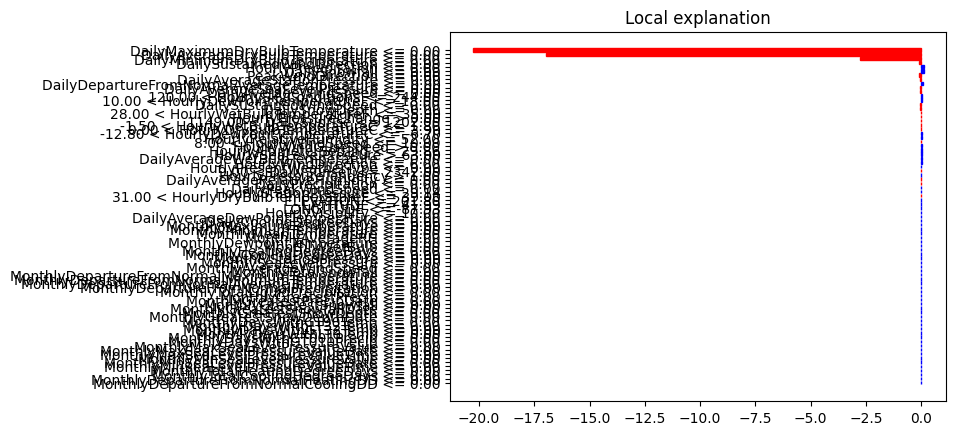

In [15]:
# Create a LIME explainer
loaded_model = joblib.load("/content/drive/MyDrive/Competicoes/working_model.pkl")
model
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # The data used for training
    feature_names=X_train.columns,  # Feature names (columns) from training data
    class_names=['Prediction'],  # The name of the predicted variable (adjust if necessary)
    mode='regression'  # Use 'classification' for classification tasks
)

# Select an instance to explain (e.g., the first row of new_data)
instance_to_explain = X_test.iloc[3]  # Change index to select a different instance

# Get the explanation for the chosen instance
explanation = explainer.explain_instance(
    instance_to_explain.values,  # The data values for the selected instance
    loaded_model.predict,  # The model's prediction function
    num_features=len(X_train)  # Display the top 5 most important features (adjust as needed)
)

# Customizing color scheme for the explanation
fig = explanation.as_pyplot_figure()
bars = fig.gca().patches

# Set red for negative and blue for positive contributions
for bar in bars:
    if bar.get_width() < 0:
        bar.set_color('red')
    else:
        bar.set_color('blue')

# Display the explanation
plt.show()

# Save the explanation figure (optional)
fig.savefig("lime_explanation2.png")


In [16]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(loaded_model)  # Use this for tree-based models like Random Forest

# Choose an instance to explain (same as LIME)
instance_to_explain = new_data.iloc[0]  # Example: explain the first row in new_data

# Get SHAP values for the instance
shap_values = explainer.shap_values(instance_to_explain)


# Visualize the SHAP values for the instance
shap.initjs()  # Initializes JS visualization for SHAP plots

# Pass the entire shap_values array (not just shap_values[0])
# and the instance_to_explain as a DataFrame
shap.force_plot(explainer.expected_value, shap_values, new_data.iloc[[0]])  # Pass the instance as a DataFrame
